In [17]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
import pandas as pd
import numpy as np

In [18]:
df = pd.read_csv("dataset.csv")

In [19]:
df.columns

Index(['time', 'P_vent', 'P_technique', 'P_room_heating', 'P_room_cooling',
       'P_pump', 'P_lightnig', 'P_heating', 'P_all_power', 'E_lighting',
       'Q_rate_equipment', 'Q_rate_people', 'P_condition_all', 'T_amb',
       'T_rate', 'T_rate_room', 'T_room', 'der(T_amb)', 'der(T_room)',
       'n_rate_equipment', 'n_rate_humidity', 'n_rate_people', 'temp_val'],
      dtype='object')

In [20]:
df = np.nan_to_num(df, nan=0, posinf=np.finfo(np.float32).max, neginf=np.finfo(np.float32).min)
max_float32 = np.finfo(np.float).max
df = np.where(np.isinf(df), max_float32, df)


print(np.isinf(df).any(), np.isinf(df).any())


False False


/var/folders/5g/7vyd0lbj2w52qz6789tj57hc0000gn/T/ipykernel_36069/2603546121.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  max_float32 = np.finfo(np.float).max


In [21]:

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)


pca = PCA(n_components=2)  
df_pca = pca.fit_transform(df_scaled)


df_reconstructed = pca.inverse_transform(df_pca)


mse = np.mean(np.power(df_scaled - df_reconstructed, 2), axis=1)


threshold = np.percentile(mse, 95)  


anomalies = np.where(mse > threshold)


print("Anomaly Indices: ", anomalies)


Anomaly Indices:  (array([   61,    62,    63,   123,   184,   185,   246,   307,   308,
         430,   431,   492,   553,   554,   676,   677,   738,   739,
         799,   800,   861,   922,   923,   984,   985,  1045,  1046,
        1107,  1108,  1109,  1143,  1144,  1145,  1146,  1147,  1148,
        1149,  1150,  1151,  1152,  1153,  1154,  1155,  1156,  1157,
        1158,  1159,  1160,  1161,  1162,  1163,  1164,  1165,  1166,
        1167,  1168,  1169,  1291,  1352,  1353,  1414,  1415,  1475,
        1598,  1599,  1660,  1844,  1845,  1906,  1907,  1967,  1968,
        2029,  2090,  2091,  2092,  2152,  2153,  2213,  2214,  2275,
        2336,  2337,  2398,  2399,  2459,  2460,  2461,  2521,  2522,
        2582,  2643,  2644,  2705,  2766,  2767,  2828,  2829,  2830,
        2831,  2832,  2833,  2834,  2835,  2836,  2837,  2838,  2839,
        2840,  2841,  2842,  2843,  2844,  2845,  2846,  2847,  2848,
        2849,  2850,  2851,  2852,  2853,  2854,  2855,  2856,  2857,
 

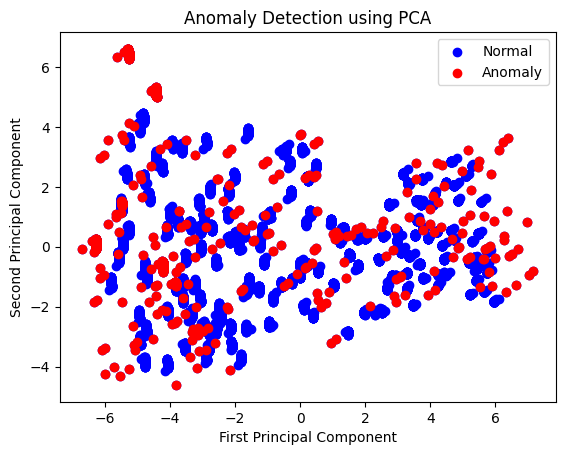

In [22]:


X = df_pca[:, 0] 
Y = df_pca[:, 1] 


plt.scatter(X, Y, color='blue', label='Normal')


plt.scatter(X[anomalies], Y[anomalies], color='red', label='Anomaly')

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

plt.title('Anomaly Detection using PCA')
plt.legend()
plt.show()


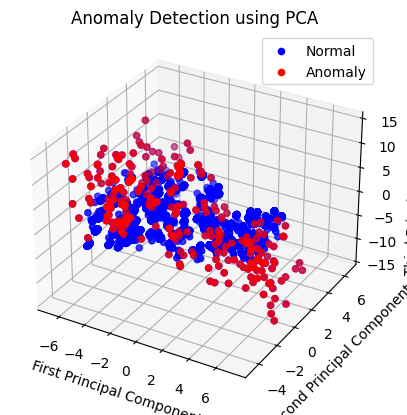

In [23]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


pca = PCA(n_components=3)
df_pca = pca.fit_transform(df_scaled)


df_reconstructed = pca.inverse_transform(df_pca)


mse = np.mean(np.power(df_scaled - df_reconstructed, 2), axis=1)


threshold = np.percentile(mse, 95)


anomalies = np.where(mse > threshold)[0]



X = df_pca[:, 0]  
Y = df_pca[:, 1]  
Z = df_pca[:, 2] 


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


ax.scatter(X, Y, Z, color='blue', label='Normal')


ax.scatter(X[anomalies], Y[anomalies], Z[anomalies], color='red', label='Anomaly')

ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')

plt.title('Anomaly Detection using PCA')
plt.legend()
plt.show()
